# <h1 align="center">Twitter Sentiment Analysis - EDA Workbook</h1>

**Welcome to your first data science project!** 🎉

This workbook will guide you through a complete sentiment analysis pipeline, from raw data to insights.

### 🎯 What is Sentiment Analysis?
Sentiment analysis is the automatic process of classifying text data according to their polarity, such as positive, negative and neutral. 

**Real-world applications:**
- Companies analyze customer tweets about their products
- Social media monitoring for brand reputation
- Market research and customer feedback analysis

**Our Goal:** Build a model to predict if a tweet's sentiment is positive, neutral or negative.

**💡 Learning Objectives:**
- Explore and understand text data
- Learn text preprocessing techniques
- Create meaningful visualizations
- Prepare data for machine learning

## <h2 align = "center" >📦 Installing Dependencies</h2>

First, let's install the libraries we'll need for our analysis.

In [2]:
# Uncomment and run this cell if you need to install required packages
# !pip install -q nltk wordcloud langdetect beautifulsoup4 contractions spacy

In [3]:
# Download the English language model for spaCy (advanced text processing)
# Run this only once
# !python -m spacy download en_core_web_sm

In [4]:
# 📚 Import essential libraries for data science
import numpy as np              # For numerical operations
import pandas as pd             # For data manipulation and analysis
import seaborn as sns          # For statistical visualizations
import matplotlib.pyplot as plt # For creating plots and charts

# 📝 Import text processing libraries
import nltk                     # Natural Language Toolkit
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from bs4 import BeautifulSoup   # For HTML parsing
import re                       # For regular expressions (pattern matching)

# Download required NLTK data
nltk.download('punkt')          # For tokenization
nltk.download('punkt_tab')      # Updated tokenization models
nltk.download('stopwords')      # Common words to filter out

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\reach\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\reach\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\reach\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## <h2> <center>🔍 Preliminary Data Exploration</center></h2>

**Key Concept:** Before building any model, we must understand our data! This step is called **Exploratory Data Analysis (EDA)**.

### 📊 About the Dataset

**The dataset contains 27.5k tweets labeled according to their sentiment.**

Each row contains the text of a tweet and a sentiment label. In the training set you are provided with a word or phrase drawn from the tweet (selected_text) that encapsulates the provided sentiment.

### 📋 Column Descriptions
* `textID` - unique ID for each piece of text
* `text` - the text of the tweet
* `sentiment` - the general sentiment of the tweet (our target variable)
* `selected_text` - [train only] the text that supports the tweet's sentiment

In [5]:
# 📂 Load the dataset
# TODO: Complete the code to read the CSV file
# Hint: Use pd.read_csv() function

df = pd.read_csv('../data/Tweets.csv')

# TODO: Display the first 5 rows of the dataset
# Hint: Use the .head() method
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


**💡 Dropdown Hint:** 
<details>
<summary>Click to see the solution</summary>

```python
df = pd.read_csv('../data/Tweets.csv')
df.head()
```
</details>

In [6]:
# TODO: Check the shape of our dataset (rows, columns)
# Hint: Use the .shape attribute

print(f"Dataset shape: {df.shape}")  # Should show (27481, 4)

Dataset shape: (27481, 4)


In [7]:
# TODO: Get basic information about the dataset
# Hint: Use the .info() method to see data types and non-null counts

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


**💡 Dropdown Hint - Understanding .info() output:** 
<details>
<summary>What does the info() method tell us?</summary>

- **RangeIndex**: Number of rows in the dataset
- **Data columns**: Column names and count
- **Non-Null Count**: How many values are not missing in each column
- **Dtype**: Data type (object = text, int64 = integer, float64 = decimal)
- **Memory usage**: How much RAM the dataset uses
</details>

In [8]:
# TODO: Check for duplicate rows in the text column
# Hint: Use df["text"].duplicated() to find duplicates

duplicates = df[df["text"].duplicated()]
print(f"Number of duplicate tweets: {len(duplicates)}")
duplicates

Number of duplicate tweets: 0


,textID,text,selected_text,sentiment


In [9]:
# Check data types of all columns
df.dtypes

textID           object
text             object
selected_text    object
sentiment        object
dtype: object

In [10]:
# TODO: Check for missing values in each column
# Hint: Use .isna().sum() to count missing values

missing_values = df.isna().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
textID           0
text             1
selected_text    1
sentiment        0
dtype: int64


In [11]:
# Let's look at the row with missing values
df[df.isna().any(axis=1)]

,textID,text,selected_text,sentiment
314,fdb77c3752,NaN,NaN,neutral


In [12]:
# TODO: Handle missing values by removing the row
# Hint: Use .dropna() method with axis=0 for rows, and inplace=True to modify the original dataframe

df.dropna(axis=0, inplace=True)
print(f"New dataset shape after removing missing values: {df.shape}")

New dataset shape after removing missing values: (27480, 4)


#### 📝 Sample Tweet Analysis

In [13]:
# Let's examine a sample tweet
sample = 100
tweet = df.text.iloc[sample]
sentiment = df.sentiment.iloc[sample]

print(f"Tweet: {tweet}")
print(f"Assigned sentiment: {sentiment}")

# TODO: Try changing the sample number above to explore different tweets!

Tweet: 4am. And Im on the beach. Pretty
Assigned sentiment: positive


#### 🎯 Target Variable Distribution

**Key Concept:** The target variable is what we want to predict. Let's see how balanced our sentiment classes are.

In [14]:
# TODO: Count how many tweets we have for each sentiment
# Hint: Use .value_counts() method on the sentiment column

sentiment_counts = df['sentiment'].value_counts()
print("Sentiment distribution:")
print(sentiment_counts)

Sentiment distribution:
sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64


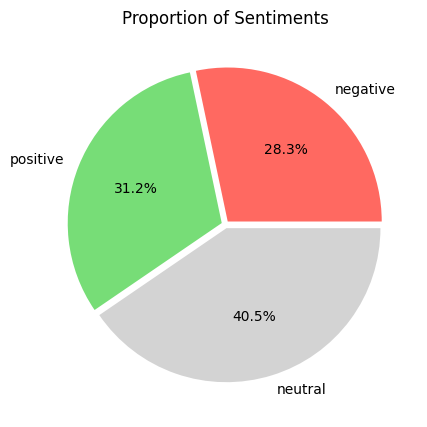

In [15]:
# TODO: Create a pie chart to visualize sentiment distribution
# The code is partially completed - fill in the missing parts

x = df.sentiment.value_counts().sort_values()

plt.figure(figsize=(5, 5))
# TODO: Complete the pie chart creation
# Hint: Use plt.pie() with parameters x=x, labels=x.index, autopct='%1.1f%%'
ax = plt.pie(x=x, labels=x.index,
             autopct='%1.1f%%',
             colors = ['#FF6961', '#77DD77', '#D3D3D3'],
             explode=[0.025]*3)

plt.title('Proportion of Sentiments')
plt.show()

**💡 Dropdown Hint:** 
<details>
<summary>Understanding the pie chart colors</summary>

- **#FF6961** (Light Red): Negative sentiments
- **#77DD77** (Light Green): Positive sentiments  
- **#D3D3D3** (Light Gray): Neutral sentiments

The `explode` parameter creates small gaps between pie slices for better visibility.
</details>

## <h2> <center>🧹 Text Preprocessing</center></h2>

**Key Concept:** Raw text data needs cleaning before analysis. This is called **preprocessing**.

### 🔧 Why Preprocessing Matters

Raw text data contains noise like:
* **HTML tags**: `<br>`, `<div>`, etc.
* **Special characters**: @, #, !, etc.
* **Contractions**: "don't" → "do not"
* **Stop words**: "the", "and", "is" (common but not meaningful)

**Benefits of preprocessing:**
* 📈 Improves model performance
* 🎯 Focuses on meaningful words
* ⚡ Reduces computational complexity

In [16]:
# First, let's analyze the most common words in our dataset
from collections import Counter

# Find the 50 most frequent words (after removing stopwords)
top_N = 50
stopwords = nltk.corpus.stopwords.words('english')
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))

# Process all text: lowercase, remove stopwords, split into words
words = (df.text
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# Create a frequency table
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

# Display the results
rslt.transpose()

Word,`,.,!,day,get,good,like,",",-,go,...,much,great,night,feel,would,wish,thanks,well,make,gonna
Frequency,9117,2439,1515,1481,1415,1325,1303,1283,1189,1162,...,543,513,510,508,492,492,492,454,442,433


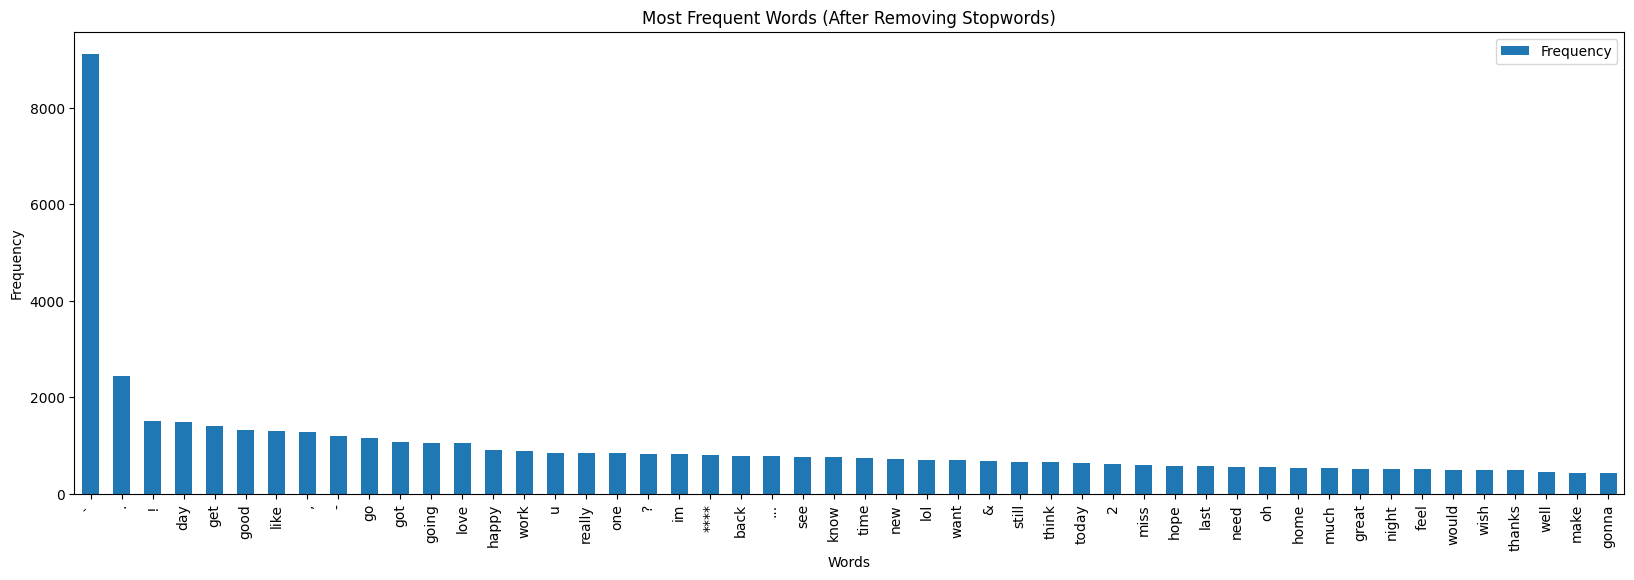

In [17]:
# Plot the most frequent words
rslt.plot.bar(rot=0, figsize=(20,6), width=0.55)
plt.xticks(rotation=90)
plt.title('Most Frequent Words (After Removing Stopwords)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

### <h2> <center>🔄 Step-by-Step Text Cleaning</center></h2>

We'll clean our text data step by step. Each step will show you the before and after effects.

In [18]:
# Helper function to show sample texts at each preprocessing step
def sample_texts(samples = 7):
    print("Sample tweets after current preprocessing step:")
    print("=" * 50)
    for i, text in enumerate(df['clean_text'].sample(samples), 1):
        print(f"{i}. {text}")
        print("")

# Create a copy of original text for cleaning
df["clean_text"] = df.text.copy()

print("Original tweets:")
sample_texts()

Original tweets:
Sample tweets after current preprocessing step:
1.  I live for pain, bring it on

2. @ inthebattle its really cute. One of my favorites.

3.  http://twitpic.com/4vp3x - *swoon* Nick looks so cute when he is serious  *faints*

4.   u don`t know harajuku lovers?

5. If you`re going to actually read them you have to at least sign up  no fair!

6. NO MORE MSHS!!!!!!!! Gotta go to work...too tired

7. contemplating borrowing one of my moms dogs just for today..i want to take care of someone.



#### Step 1: Remove HTML Tags 🏷️
**(OPTIONAL - ADVANCED)** This step removes HTML markup from tweets.

In [19]:
# OPTIONAL: Advanced HTML tag removal function
def strip_html_tags(text):
    """Remove HTML tags and clean up formatting"""
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    return stripped_text

df["clean_text"] = df["clean_text"].apply(strip_html_tags)
sample_texts()

Sample tweets after current preprocessing step:
1. Mom is wearing shrug I bought her 2morrow...I can`t wait 2 c her n it..cute

2. has to be in cockermouth for 8:45 tomorrow morning, jesus christ i want sleep

3. wants to goto lonovala for frenz wedding....bt....no transport arrngmnts wrkg out

4.  I thought every weekend was a long weekend in California

5.  No this is not redirects, this is just updating posts on our website massage.dk .. next item => publish, next item => pulish

6. hasn`t had time to go on twitter since working full time!

7. ready for a day full of His presence  i`m expecting the best!



#### Step 2: Handle Accented Characters 🌍
**(OPTIONAL - ADVANCED)** This converts accented characters to regular ASCII.

In [20]:
# OPTIONAL: Advanced accented character handling
import unicodedata

def replace_accented_chars(text):
    """Convert accented characters to ASCII equivalents
    Example: café → cafe, résumé → resume"""
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

df["clean_text"] = df["clean_text"].apply(replace_accented_chars)
sample_texts()

Sample tweets after current preprocessing step:
1. Watched Kunguma poovum konjuma puravum... Liked it very much!  excellent cinematography!!!

2. happy mothers` day to all your moms!

3.  why, hello there  How`s life on the other side of the screen?

4. Roscoe - Smooth Sailin` WHY DID NO ONE TELL ME ABOUT THIS SONG?????? RAP FRIENDS U HAVE FAILED ME

5. I don`t think the neti pot is working for me  maybe I`m doing it wrong?

6.  BTW I STILL can`t believe how Awesome the NEWJABBAKIDZ performance was...U in the masks..I screamed at my pc

7. healthy food is NOT helping my hangover



#### Step 3: Remove Special Characters ✨
**This step is important for beginners to understand!**

In [21]:
def remove_special_characters(text):
    """Remove special characters but keep letters, digits, and emotional indicators (!?)
    
    Why keep !? → They indicate emotional intensity which is useful for sentiment analysis
    """
    # TODO: Complete the regular expression pattern
    # Hint: The pattern [^A-Za-z0-9!?'`] means "anything that is NOT a letter, digit, or these symbols"
    text = re.sub(r"[^A-Za-z0-9!?\'\`]", " ", text)
    return text

df["clean_text"] = df["clean_text"].apply(remove_special_characters)
sample_texts()

Sample tweets after current preprocessing step:
1. i love the music video of you belong with me by taylor

2. taking mum to lunch for mothers day

3. Just got home from a work   and not looking forward to it tomorrow morning! Oh and tomorrow night! Great

4. 1st day of master cleanse   wish me luck

5. And they are so censoring over at nin com  nobody can really speculate about these things are disagree with anything

6. I hope everyone had a great weekend! I will be here on and off today as I have 2 important meetings today

7. I dont like this random gloomy weather



**💡 Dropdown Hint:** 
<details>
<summary>Understanding Regular Expressions (Regex)</summary>

- `[^...]` means "NOT any character inside the brackets"
- `A-Za-z` means "any letter from A to Z (upper or lowercase)"
- `0-9` means "any digit from 0 to 9"
- `!?\'\`` means "exclamation, question mark, apostrophe, backtick"
- The `\` before special characters "escapes" them (tells regex to treat them literally)
</details>

#### Step 4: Expand Contractions 📝
**Key for beginners:** This makes text more standardized.

In [22]:
import contractions

def expand_contractions(text):
    """Expand contractions in English text
    
    Examples:
    - don't → do not
    - I'm → I am  
    - we'll → we will
    
    Why? This standardizes text and can improve sentiment analysis accuracy.
    """
    # TODO: Use the contractions library to expand contractions
    # Hint: contractions.fix() does this automatically
    text = contractions.fix(text)
    return text

df["clean_text"] = df["clean_text"].apply(expand_contractions)
sample_texts()

Sample tweets after current preprocessing step:
1. omg! i did not even know my friend knew  !!! lol its a small world

2. I do not like things getting confused  Seems to be happening alot lately

3. finishing washing dishes

4.  gah! no money      at least not for bakugan

5.  wh wha? hacky sack plans sans Jackie???

6.   cool  i saw it now in the link thanks

7.  Thank you      



#### Step 5: Remove Stop Words 🛑
**Important concept for beginners!**

In [23]:
def strip_stops(text, is_lower_case=False, custom=True):
    """Remove stop words (common words that don't add much meaning)
    
    Stop words examples: the, and, is, are, was, were, a, an, this, that
    
    Why remove them? They appear frequently but don't indicate sentiment.
    """
    # TODO: Tokenize the text into individual words
    # Hint: Use word_tokenize() function
    tokens = word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    
    if custom:
        # Get English stop words from NLTK
        stop_words = set(nltk.corpus.stopwords.words('english'))
        
        # TODO: You can add custom stop words here if needed
        # Example: stop_words.update(['rt', 'via'])  # Twitter-specific stop words

    # Filter out stop words
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stop_words]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

    # Join tokens back into text
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

print("⏳ Removing stop words... (this might take a moment)")
df["clean_text"] = df["clean_text"].apply(strip_stops)
sample_texts()

⏳ Removing stop words... (this might take a moment)
Sample tweets after current preprocessing step:
1. Oh ` really much opinion either way ` night rip everything

2. includes chota chota stuff released Reflexie Arcade !

3. Man great sense humour Venky Pachad ?

4. making cupcakes says ` kelli ` bad sister

5. Helping cousin get ready 8th grade dance growing

6. 'Shut ' line removed locker scene ! bet could recite speech easily ! Dare ? ! ? !

7. Watching Ellen Love ! ! dishes tanning ` gorgeous !



## <h2> <center>🔤 Tokenization Deep Dive</center></h2>

**Key Concept:** Tokenization splits text into smaller units (tokens) like words or sentences. Let's explore different methods!

### 🎯 Understanding Tokenization

**Tokenization** is splitting text into meaningful pieces. We'll compare 4 methods:
1. **Python split()** - Simple but limited
2. **Regular expressions** - More control
3. **NLTK** - Good balance
4. **spaCy** - Most advanced

Let's see how each handles tricky cases!

In [24]:
# Test sentences with different challenges
sent1 = "I am going to delhi"
sent2 = "I have a Ph.D in M.L"
sent3 = "We're here to help! mail us at xyz@gmail.com"

print("Test sentences:")
print(f"1. {sent1}")
print(f"2. {sent2}")
print(f"3. {sent3}")

Test sentences:
1. I am going to delhi
2. I have a Ph.D in M.L
3. We're here to help! mail us at xyz@gmail.com


In [25]:
# Method 1: Python's basic split() - splits at whitespace
print("Method 1 - Python split():")
print(f"Sentence 1: {sent1.split()}")
print(f"Sentence 2: {sent2.split()}")
print(f"Sentence 3: {sent3.split()}")

Method 1 - Python split():
Sentence 1: ['I', 'am', 'going', 'to', 'delhi']
Sentence 2: ['I', 'have', 'a', 'Ph.D', 'in', 'M.L']
Sentence 3: ["We're", 'here', 'to', 'help!', 'mail', 'us', 'at', 'xyz@gmail.com']


In [26]:
# Method 2: Regular expressions - more sophisticated pattern matching
import re

print("Method 2 - Regular Expressions:")
# TODO: Complete the regex pattern to find word characters and apostrophes
# Hint: [\w'] means "word characters or apostrophes", + means "one or more"
pattern = r"[\w']+"
print(f"Sentence 1: {re.findall(pattern, sent1)}")
print(f"Sentence 2: {re.findall(pattern, sent2)}")
print(f"Sentence 3: {re.findall(pattern, sent3)}")

Method 2 - Regular Expressions:
Sentence 1: ['I', 'am', 'going', 'to', 'delhi']
Sentence 2: ['I', 'have', 'a', 'Ph', 'D', 'in', 'M', 'L']
Sentence 3: ["We're", 'here', 'to', 'help', 'mail', 'us', 'at', 'xyz', 'gmail', 'com']


In [27]:
# Method 3: NLTK - handles punctuation well
from nltk.tokenize import word_tokenize

print("Method 3 - NLTK:")
print(f"Sentence 1: {word_tokenize(sent1)}")
print(f"Sentence 2: {word_tokenize(sent2)}")
print(f"Sentence 3: {word_tokenize(sent3)}")

Method 3 - NLTK:
Sentence 1: ['I', 'am', 'going', 'to', 'delhi']
Sentence 2: ['I', 'have', 'a', 'Ph.D', 'in', 'M.L']
Sentence 3: ['We', "'re", 'here', 'to', 'help', '!', 'mail', 'us', 'at', 'xyz', '@', 'gmail.com']


In [28]:
# Method 4: spaCy - most advanced, keeps email addresses intact
import spacy

# Load the English language model
nlp = spacy.load('en_core_web_sm') 

print("Method 4 - spaCy:")
for i, sent in enumerate([sent1, sent2, sent3], 1):
    doc = nlp(sent)
    tokens = [token.text for token in doc]
    print(f"Sentence {i}: {tokens}")

Method 4 - spaCy:
Sentence 1: ['I', 'am', 'going', 'to', 'delhi']
Sentence 2: ['I', 'have', 'a', 'Ph', '.', 'D', 'in', 'M.L']
Sentence 3: ['We', "'re", 'here', 'to', 'help', '!', 'mail', 'us', 'at', 'xyz@gmail.com']


**💡 Dropdown Hint:** 
<details>
<summary>Which tokenization method should you choose?</summary>

- **Python split()**: Good for simple, clean text
- **Regular expressions**: When you need custom patterns
- **NLTK**: Good general-purpose choice, handles punctuation well
- **spaCy**: Best for complex text, preserves meaningful units (like email addresses)

For most NLP projects, NLTK or spaCy are recommended.
</details>

#### 🌱 Stemming vs Lemmatization

**Key Concept:** Both reduce words to their base form, but differently:
- **Stemming**: Fast, rule-based chopping (might create non-words)
- **Lemmatization**: Slower, but produces real dictionary words

In [29]:
# Stemming example
from nltk.stem.porter import PorterStemmer

porter_stemmer = PorterStemmer()

# TODO: Complete the stemming function
def stem_words(text):
    return " ".join([porter_stemmer.stem(word) for word in text.split()])

sample = "Walk walking walked walks running runner"
print(f"Original: {sample}")
print(f"Stemmed:  {stem_words(sample)}")

# Notice: Some stems might not be real words!

Original: Walk walking walked walks running runner
Stemmed:  walk walk walk walk run runner


In [30]:
# Lemmatization example (produces real dictionary words)
def lemmatize_sentence(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

print(f"Original:    {sample}")
print(f"Lemmatized:  {lemmatize_sentence(sample)}")

# Notice: All results are real English words!

Original:    Walk walking walked walks running runner
Lemmatized:  walk walking walk walk run runner


### Apply Lemmatization to Our Dataset
**(OPTIONAL - ADVANCED)** This step uses spaCy for advanced text processing.

In [31]:
# Install progress bar for better user experience
%pip install -q --upgrade ipywidgets jupyter

Note: you may need to restart the kernel to use updated packages.


In [32]:
# OPTIONAL: Advanced batch lemmatization function
from tqdm.notebook import tqdm

def lemmatize_sentences(texts):
    """Lemmatize a list of texts efficiently using batch processing"""
    lemmatized = []
    for doc in tqdm(
        nlp.pipe(texts, batch_size=512),  # Process texts in batches for efficiency
        desc="Lemmatizing texts", 
        total=len(texts)
    ):
        lemmatized.append(" ".join([token.lemma_ for token in doc]))
    return lemmatized

print("⏳ Applying lemmatization... (this will take a few minutes)")
df["clean_text"] = lemmatize_sentences(df["clean_text"])
print("✅ Lemmatization complete!")
sample_texts()

⏳ Applying lemmatization... (this will take a few minutes)


Lemmatizing texts:   0%|          | 0/27480 [00:00<?, ?it/s]

✅ Lemmatization complete!
Sample tweets after current preprocessing step:
1. good ! gor juz yea kno ask yesterday tha hospital talk say

2. oh ! ! hope ` bad

3. ` mind Sam like Kate ` like Chris ` smarmy

4. Congrats ! cuss like matter minute ` know reward

5. thank ! makeup art top notch come house every morning ! ha ha

6. result salary decrease

7. love idea give year theme year new beginning !



### 🌍 Check for Multilingual Data
**(OPTIONAL - ADVANCED)** Let's see if our dataset contains non-English tweets.

In [33]:
# OPTIONAL: Language detection setup
from langdetect import detect, DetectorFactory
from collections import defaultdict

# Set seed for consistent results
DetectorFactory.seed = 0

# Test language detection
print("Language detection examples:")
print(f"English: {detect('War does not show who is right, just who is left.')}")
print(f"Hindi: {detect('आप कैसे हैं?')}")

Language detection examples:
English: en
Hindi: hi


In [34]:
# OPTIONAL: Check for multilingual content in our dataset
languages = defaultdict(list)

# Sample 1000 random texts for language detection (full dataset would be too slow)
samples = np.random.choice(len(df.text), size=1000, replace=False)

for row in tqdm(samples, desc="Detecting languages", total=len(samples)):
    try:
        lang = detect(df.text.iloc[row])
        languages[lang].append(df.text.iloc[row])
    except:
        # If detection fails, assume English
        languages['en'].append(df.text.iloc[row])

# Show language distribution
for lang, texts in languages.items():
    print(f"Language: {lang} ({len(texts)} samples)")
    if len(texts) <= 3:
        for text in texts:
            print(f"  - {text}")
    print()

Detecting languages:   0%|          | 0/1000 [00:00<?, ?it/s]

Language: en (924 samples)

Language: fi (2 samples)
  - i really miss my satan kitty
  -  i miss you too

Language: fr (6 samples)

Language: so (9 samples)

Language: pt (3 samples)
  -  no im not  cries LOL
  -  Yes I do
  -  Why do you not respond me?

Language: af (10 samples)

Language: cy (7 samples)

Language: ca (5 samples)

Language: id (3 samples)
  -  Thank you! Tadi jam 12.30pm
  -  Yeah i like it
  - Yeah  :p

Language: nl (7 samples)

Language: tl (3 samples)
  - awake sadly        seeing Leon today !
  - http://twitpic.com/4w269 - My 789 pacman pic
  -  I`m not giving up http://bit.ly/SnjEn

Language: no (4 samples)

Language: sv (3 samples)
  - just slammed my finger in a car dor  FML ow
  -   stop itt!
  -  http://twitpic.com/24mer - i like Mr Piggls I mean Pickles!!

Language: hr (3 samples)
  - just woke up
  - save me--i feel like i`m going crazy.  ? http://blip.fm/~5z193
  - i just reading a magazine

Language: et (2 samples)
  - just had KFC
  - I`ve just realise

In [37]:
# TODO: Save our cleaned dataset for future use
# Hint: Use df.to_csv() with index=False to avoid saving row indices

df.to_csv('../data/cleaned_tweets.csv', index=False)
print("✅ Cleaned dataset saved successfully!")

✅ Cleaned dataset saved successfully!


## <h2> <center>📊 Data Visualization</center></h2>

**Key Concept:** Visualizations help us understand patterns in our data. Let's create insightful charts!

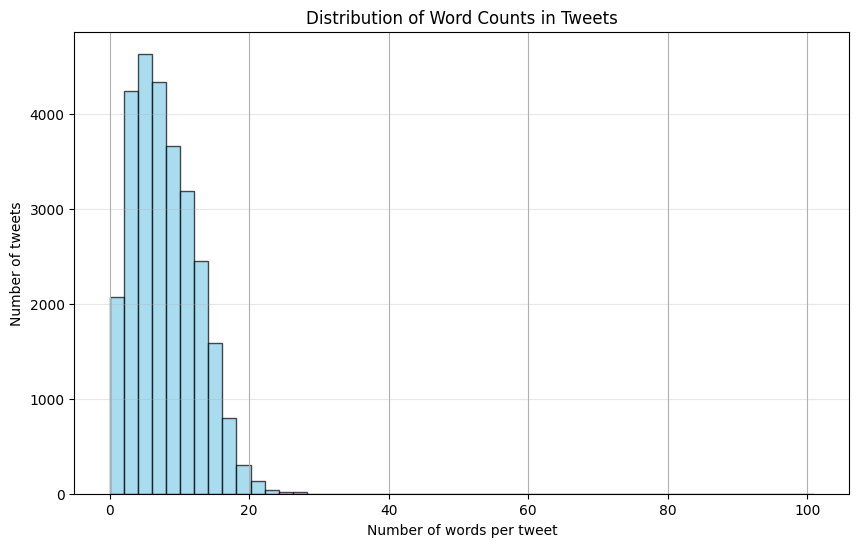

Average words per tweet: 8.4
Median words per tweet: 8.0


In [38]:
# TODO: Analyze tweet length distribution
# Hint: Create a new column that counts words in each cleaned tweet

df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))

# Create histogram of word counts
plt.figure(figsize=(10, 6))
df.word_count.hist(bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Number of words per tweet')
plt.ylabel('Number of tweets')
plt.title('Distribution of Word Counts in Tweets')
plt.grid(axis='y', alpha=0.3)
plt.show()

print(f"Average words per tweet: {df.word_count.mean():.1f}")
print(f"Median words per tweet: {df.word_count.median():.1f}")

In [39]:
# TODO: Get statistical summary of our dataset
# Hint: Use .describe() to get statistical measures

df.describe()

,word_count
count,27480.000000
mean,8.375182
std,4.603315
min,0.000000
25%,5.000000
50%,8.000000
75%,11.000000
max,101.000000


<Figure size 1500x800 with 0 Axes>

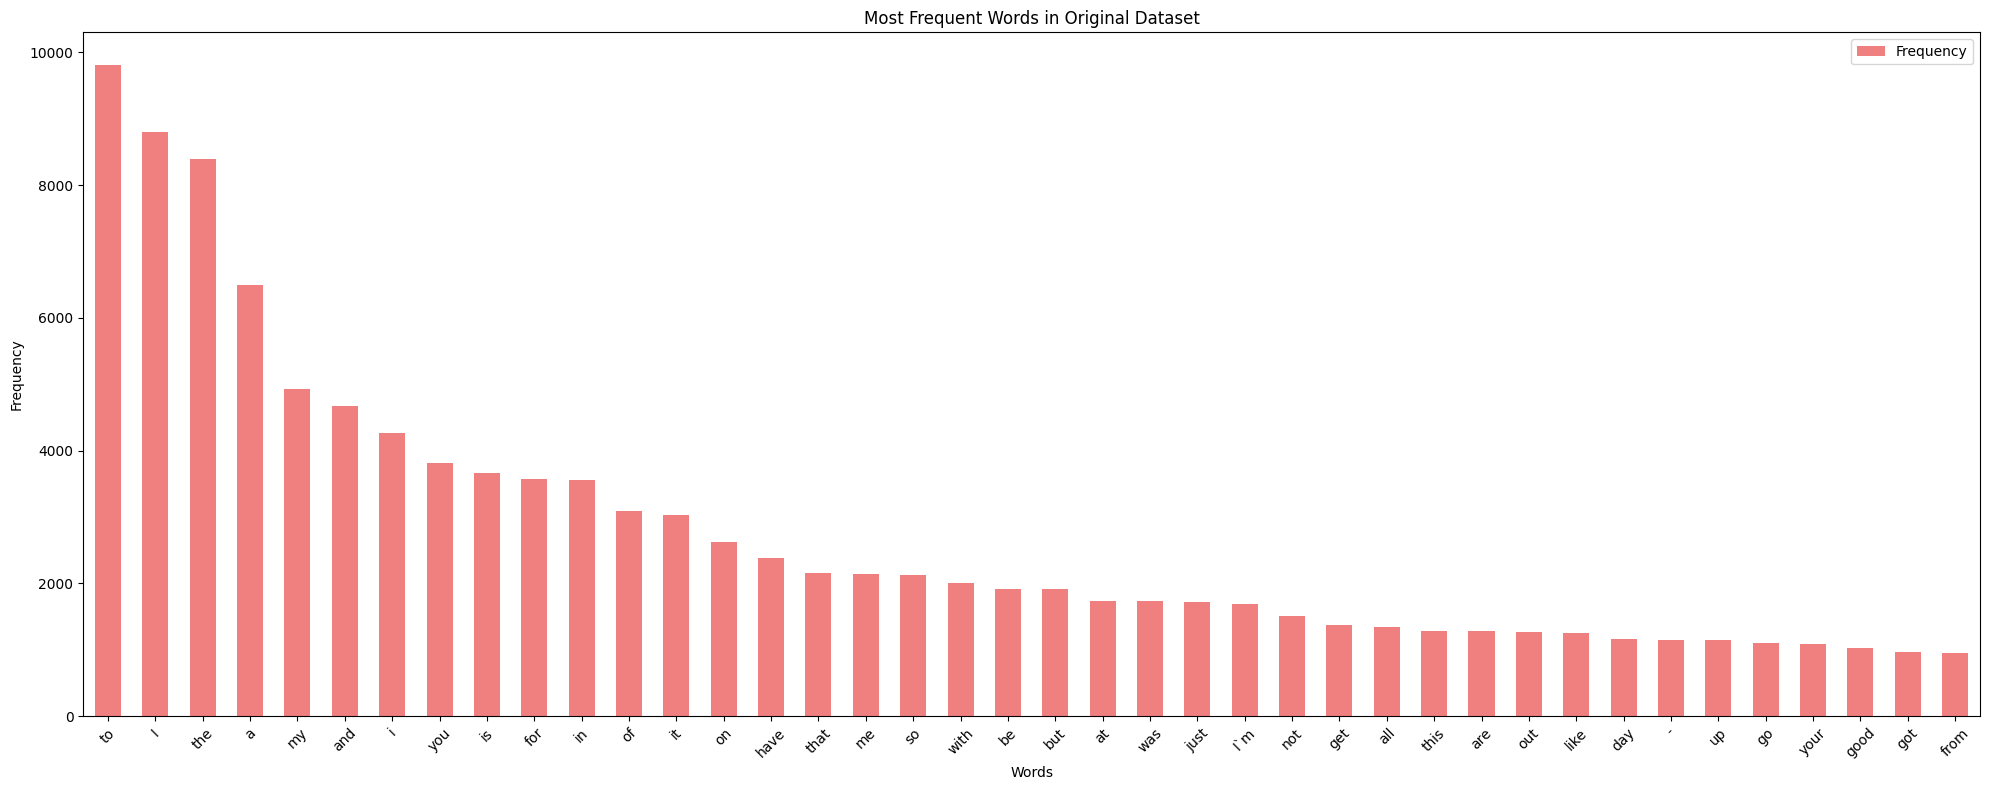

In [40]:
# Create a frequency analysis of the most common words
top_N = 40

# TODO: Combine all text and split into individual words
# Hint: Use .str.cat(sep=' ') to join all text, then .split() to get words
words = (df.text.str.cat(sep=' ').split())

# Count word frequencies and create a DataFrame
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

# Plot the results
plt.figure(figsize=(15, 8))
rslt.plot.bar(rot=0, figsize=(20, 8), width=0.55, color='lightcoral')
plt.xticks(rotation=45)
plt.title('Most Frequent Words in Original Dataset')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<h2><center>☁️ Word Cloud Visualizations</center></h2>

**Key Concept:** Word clouds show word frequency visually - bigger words appear more often!

### 🎨 Understanding Word Clouds

**Word clouds** are visual representations where:
- **Larger text** = More frequent words
- **Different colors** = Visual appeal and grouping
- **Word positioning** = Random but meaningful

We'll create separate word clouds for **Positive**, **Negative**, and **Neutral** tweets to see what words are characteristic of each sentiment.

In [41]:
# Install wordcloud if needed
# !pip install -q wordcloud

In [47]:
from wordcloud import WordCloud, STOPWORDS

# TODO: Split dataset by sentiment
# Hint: Use boolean indexing with df[df['sentiment'] == 'sentiment_name']
negative_df = df[df['sentiment'] == 'negative']
positive_df = df[df['sentiment'] == 'positive'] 
neutral_df = df[df['sentiment'] == 'neutral']

print(f"Negative tweets: {len(negative_df)}")
print(f"Positive tweets: {len(positive_df)}")
print(f"Neutral tweets: {len(neutral_df)}")

def generate_wordcloud(data, title, color='viridis'):
    """Generate and display a WordCloud for given data"""
    # Combine all text from the sentiment category
    words = ' '.join(data["clean_text"])
    
    # Clean the text further for word cloud
    cleaned_str = " ".join([word for word in words.split()
                            if 'http' not in word  # Remove URLs
                                and not word.startswith('@')  # Remove mentions
                                and word != 'RT'  # Remove retweet indicators
                                and len(word) > 2])  # Remove very short words

    # Create word cloud
    wordcloud = WordCloud(
        stopwords=STOPWORDS,
        background_color='white', 
        width=1200,
        height=600,
        max_words=100,
        colormap=color
    ).generate(cleaned_str)

    # Display the word cloud
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

Negative tweets: 7781
Positive tweets: 8582
Neutral tweets: 11117


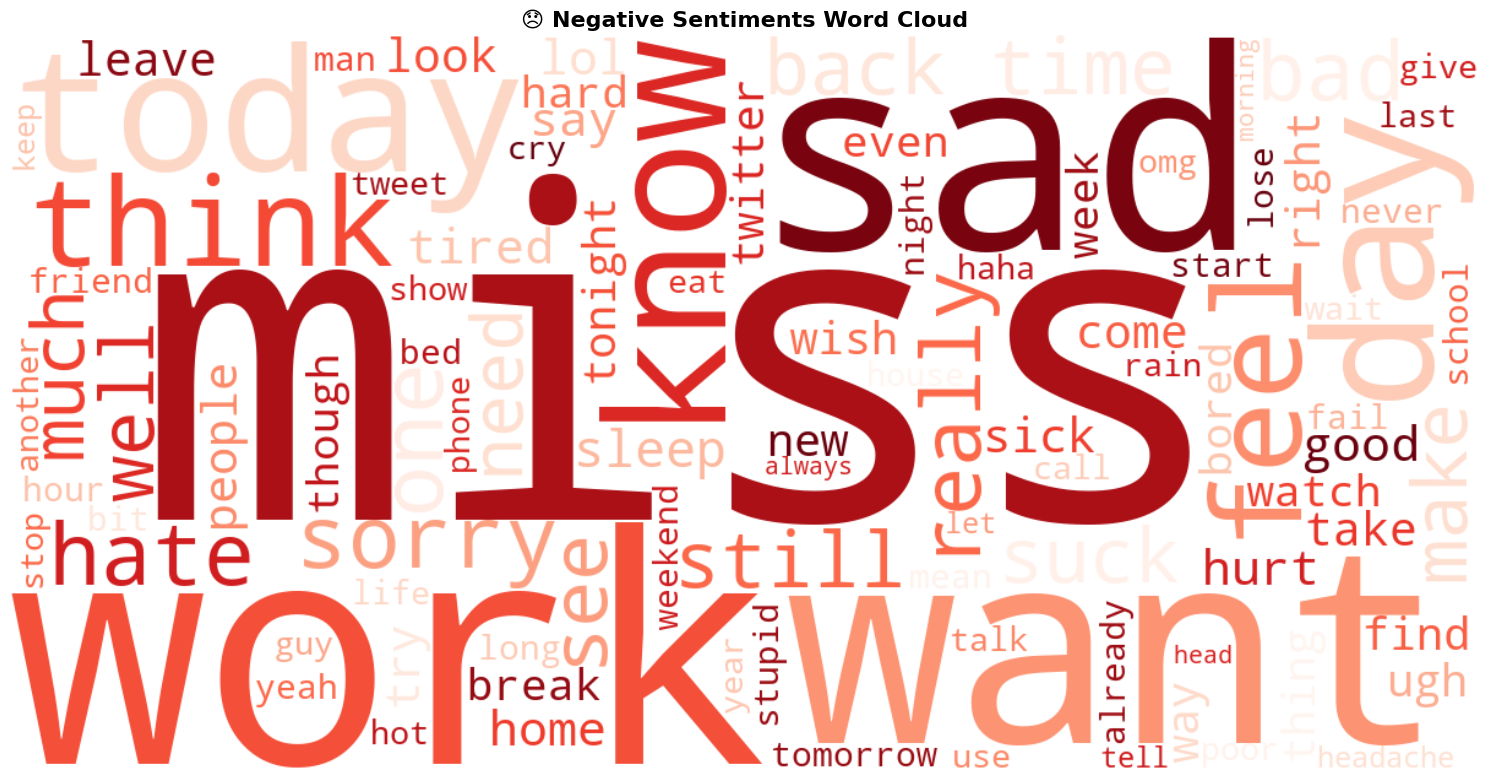

In [48]:
# TODO: Generate word clouds for each sentiment
# Try different color schemes: 'Reds', 'Blues', 'Greens', 'viridis', 'plasma'

generate_wordcloud(negative_df, '😞 Negative Sentiments Word Cloud', 'Reds')

In [45]:
print(positive_df.shape)

(0, 6)


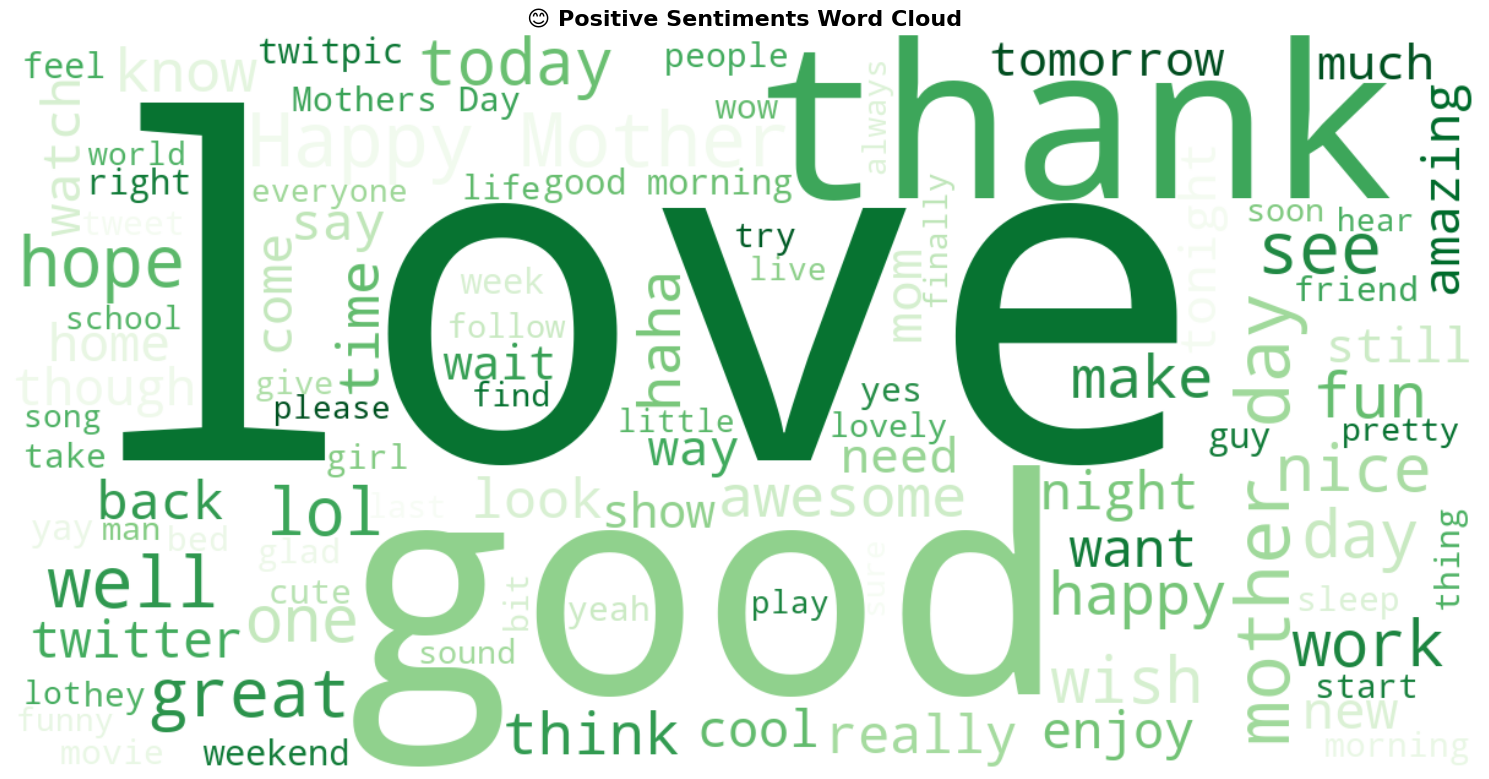

In [49]:
generate_wordcloud(positive_df, '😊 Positive Sentiments Word Cloud', 'Greens')

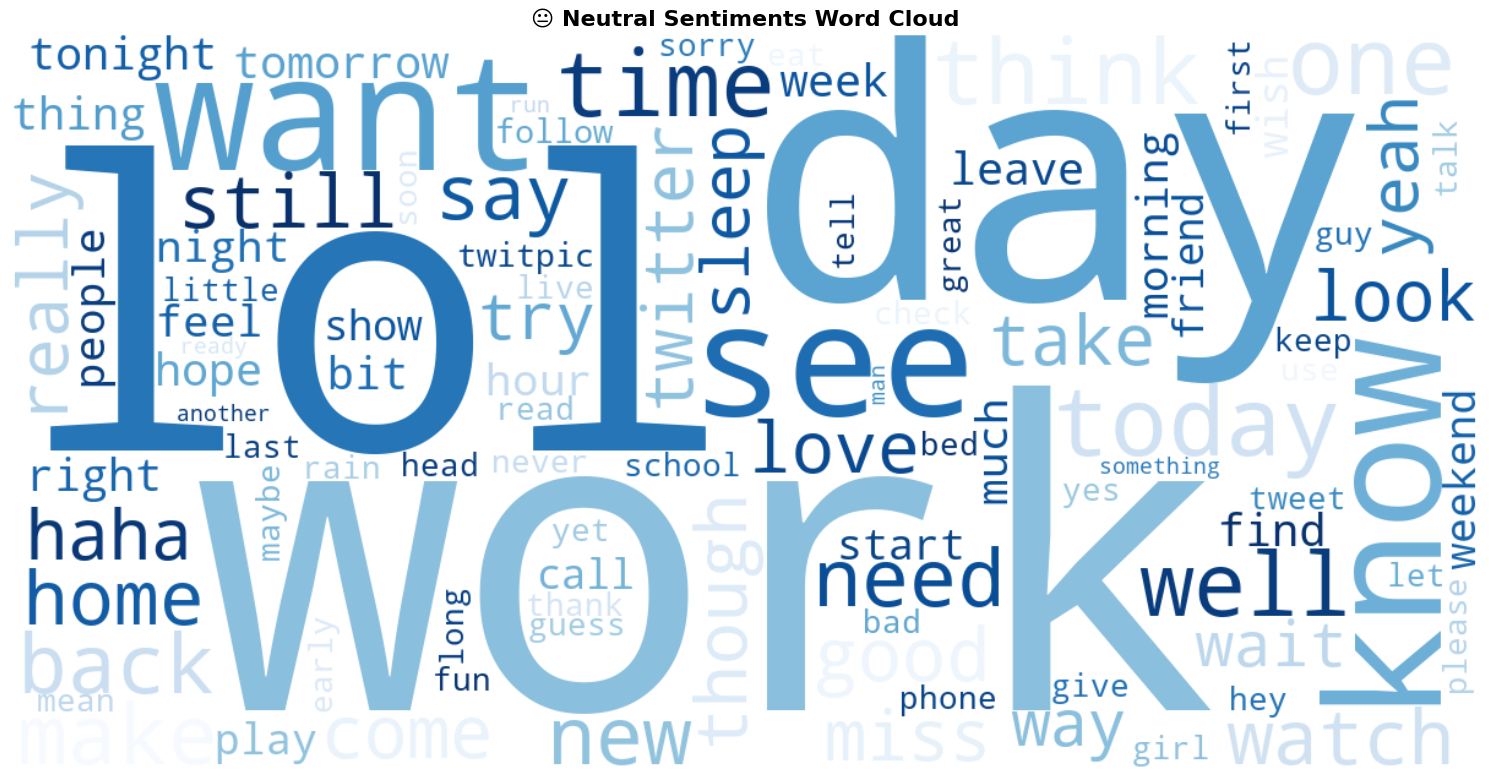

In [50]:
generate_wordcloud(neutral_df, '😐 Neutral Sentiments Word Cloud', 'Blues')

---

## 🎉 Congratulations!

You've completed the **Exploratory Data Analysis and Preprocessing** phase! 

### 📝 What You've Learned:
1. **📊 Data Exploration**: Checked data shape, missing values, and distributions
2. **🧹 Text Preprocessing**: Cleaned text data step by step
3. **🔤 Tokenization**: Learned different ways to split text into words
4. **🌱 Text Normalization**: Applied stemming and lemmatization
5. **📈 Data Visualization**: Created meaningful charts and word clouds

### 🚀 Next Steps:
- **Feature Engineering**: Convert text to numerical features
- **Model Building**: Train machine learning models
- **Model Evaluation**: Test and improve model performance

**💡 Challenge:** Try modifying the preprocessing steps and see how it affects the word clouds!

---

**🏆 Pro Tip:** The quality of your preprocessing directly impacts model performance. Well-cleaned data leads to better predictions!